# Imports

In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Large, VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.optimizers import Adam

# Dataset

In [2]:

mydir = r'D:\Course\Mtech- CS\SummerProject&Desartation\Original_dataset(7-class)'
categories = ['CR_Embedded_scab', 'CR_Rolled_in_Scale', 'CR_SCALE_RIS', 'CR_Sliver_NMI', 'HR_Scab_Patch', 'HR_Sliver_NMI', 'HR_Sliver_Slab_Stage']

# Data Preprocessing

0. Originally, there is 780 images of 7 classes which is incresed by 1547 images using data augmentation
1. Gathering the data of all classes and stored into a list called 'data'
2. Adding An extra chanel using edge detection with RGB chanel
3. Labeling the data into its correspoding classes as: 
    'CR_Embedded_scab' --> 0, 
    'CR_Rolled_in_Scale' ---> 1, 
    'CR_SCALE_RIS' ---> 2, 
    'CR_Sliver_NMI' ---> 3, 
    'HR_Scab_Patch' ---> 4, 
    'HR_Sliver_NMI' ---> 5, 
    'HR_Sliver_Slab_Stage' ---> 6

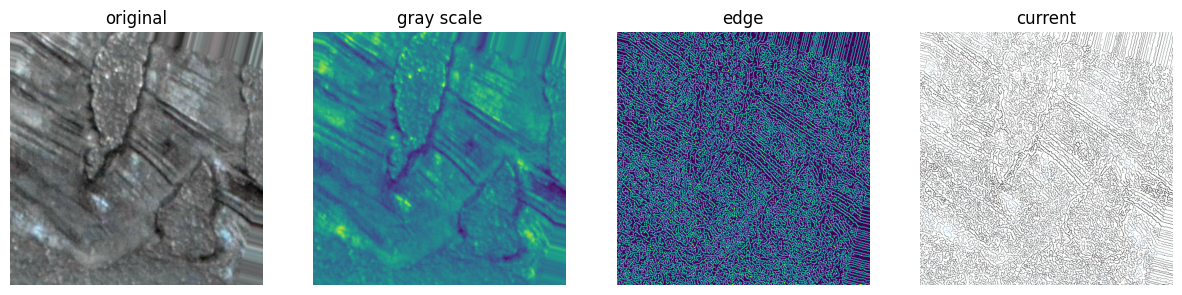

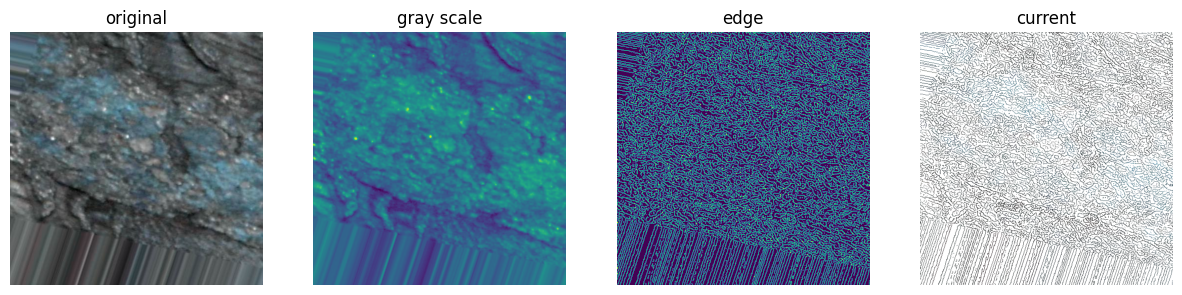

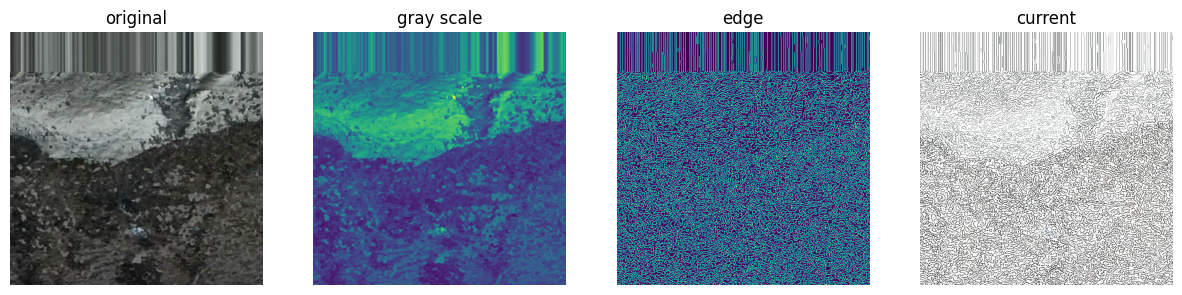

In [3]:
# Load data
data = []
flag = 1
for label, category in enumerate(categories):
    folder_path = os.path.join(mydir, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 512))
        # Create edge detection channel
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=5)

        # Stack the edge channel with the RGB channels
        edges = np.expand_dims(edges, axis=-1)
        img_with_edges = np.concatenate((img, edges), axis=-1)

        # Plotting 4 of the original, grayscale, edge-detected and transformed images
        if 400 < flag <404:
            images = [img, gray, edges, img_with_edges]
            titles = ['original', 'gray scale', 'edge', 'current']
            plt.figure(figsize=(15, 5))
            for i in range(4):
                plt.subplot(1, 4, i + 1)
                plt.imshow(images[i])
                plt.title(titles[i])
                plt.axis('off')
            plt.show()

        flag = flag + 1
        data.append([img_with_edges, label])

In [5]:
print(data[0][0][1])

[[112 119 128 255]
 [110 118 125 255]
 [111 117 122 255]
 ...
 [ 95  98 102 255]
 [ 99 103 108 255]
 [ 99 105 110 255]]


# shuffle all the data

In [4]:
random.shuffle(data)

# Separate the feature as x and corresponding label as y

In [5]:
# Separate features (x) and labels (y)
x = np.array([entry[0] for entry in data])
y = np.array([entry[1] for entry in data])

In [6]:
print(f'shape of x : ',x.shape)
# print(f'x: ',x)
print(f'shape of y : ',y.shape)
# print(f'y: ',y)

shape of x :  (780, 512, 512, 4)
shape of y :  (780,)


Normalizing

In [7]:
x = x.astype('float32')/255

In [ ]:
# print(x)

# Spliting The into train and test set

In [ ]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(624, 512, 512, 4)
(624,)
(156, 512, 512, 4)
(156, 512, 512, 4)


In [ ]:
print(y_train)

[5 5 1 4 1 4 5 4 5 4 5 4 1 5 5 2 4 4 4 6 2 3 1 2 6 4 2 1 4 1 0 1 2 4 4 5 1
 3 2 2 0 5 2 2 5 5 1 4 5 1 6 0 5 4 1 5 4 2 3 4 5 1 4 5 6 4 0 4 1 4 1 2 3 5
 2 2 5 4 0 5 5 4 4 5 1 1 1 4 5 5 5 2 5 5 3 4 4 1 4 4 0 5 5 1 1 4 4 2 4 2 5
 4 4 5 4 5 2 5 4 2 2 5 5 1 5 5 1 1 6 1 4 1 4 6 6 4 5 0 4 0 0 2 5 6 4 2 5 5
 2 5 5 3 4 4 0 5 3 6 4 4 5 4 4 4 4 0 2 0 2 5 5 6 5 5 2 2 1 4 4 5 3 2 5 5 2
 1 6 3 1 5 2 3 2 1 6 1 1 5 3 2 0 6 5 5 5 3 5 1 2 6 5 4 3 4 5 2 5 5 5 5 4 3
 5 3 3 4 0 4 4 5 3 2 6 5 1 1 5 5 1 6 6 5 4 2 3 4 4 6 2 1 5 5 2 5 5 4 6 4 4
 4 6 2 4 2 4 5 4 0 2 5 3 4 6 0 4 4 3 4 0 5 2 0 2 2 3 5 4 5 3 5 2 1 5 4 4 3
 1 5 2 4 5 1 5 2 3 0 1 4 3 5 5 6 2 1 5 5 1 2 3 5 5 5 5 5 5 0 6 0 5 2 5 2 0
 1 6 5 0 6 5 4 5 4 4 6 3 1 3 5 2 0 5 3 4 1 4 2 0 6 4 4 6 5 5 2 5 5 5 6 5 6
 2 6 2 5 5 5 1 2 5 1 4 4 1 1 2 4 6 2 5 5 0 5 0 4 3 3 5 6 5 3 3 4 2 5 5 5 5
 2 2 5 6 5 4 4 4 2 1 5 2 6 2 3 3 4 1 2 2 4 2 4 5 1 4 5 5 5 2 5 5 5 5 4 6 5
 3 5 4 5 1 2 5 4 2 5 4 4 5 4 3 3 4 4 2 6 5 4 4 5 6 6 5 5 5 5 5 5 1 2 2 5 0
 5 2 5 6 6 1 5 2 5 4 5 6 

In [ ]:
# One-hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(categories))

In [ ]:
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


# Functions to constract models:

In [ ]:
input_shape = (512, 512, 4)

In [ ]:
def create_preprocessing_layer(input_shape):
    input_layer = Input(shape=input_shape)
    # Reduce 4 channels to 3 channels using a Conv2D layer
    x = Conv2D(3, (1, 1), padding='same', activation='relu')(input_layer)
    return Model(inputs=input_layer, outputs=x)

In [ ]:
def create_mobilenetv1_model(base_model):
    preprocessing_model = create_preprocessing_layer(input_shape)
    inputs = Input(shape=input_shape)
    x = preprocessing_model(inputs)
    base_model.trainable = False  # Freeze the base model
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [65]:
def create_mobilenetv2_model(base_model,input_shape):
    preprocessing_model = create_preprocessing_layer(input_shape)
    inputs = Input(shape=input_shape)
    x = preprocessing_model(inputs)
    base_model.trainable = False  # Freeze the base model
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [66]:
def create_mobilenetv3_model(base_model,input_shape):
    preprocessing_model = create_preprocessing_layer(input_shape)
    inputs = Input(shape=input_shape)
    x = preprocessing_model(inputs)
    base_model.trainable = False  # Freeze the base model
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [67]:
def create_vgg16_model(base_model,input_shape):
    preprocessing_model = create_preprocessing_layer(input_shape)
    inputs = Input(shape=input_shape)
    x = preprocessing_model(inputs)
    base_model.trainable = False  # Freeze the base model
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [68]:
def create_resnet50_model(base_model,input_shape):
    preprocessing_model = create_preprocessing_layer(input_shape)
    inputs = Input(shape=input_shape)
    x = preprocessing_model(inputs)
    base_model.trainable = False  # Freeze the base model
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# List of Models:

In [ ]:
models = {
    "MobileNetV1": create_mobilenetv1_model(MobileNet(weights='imagenet', include_top=False),input_shape),
    "MobileNetV2": create_mobilenetv2_model(MobileNetV2(weights='imagenet', include_top=False),input_shape),
    "MobileNetV3": create_mobilenetv2_model(MobileNetV3Large(weights='imagenet', include_top=False),input_shape),
    "VGG16": create_vgg16_model(VGG16(weights='imagenet', include_top=False),input_shape),
    "ResNet50": create_resnet50_model(ResNet50(weights='imagenet', include_top=False),input_shape)
}

# Model Summary:

In [ ]:
for name, model in models.items():
    model.summary()

# Compile models:

In [ ]:
for name, model in models.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"{name} model compiled.")

# Train and Evaluate each models:

In [ ]:
histories = {}
results = {}
epochs = 30
batch_size = 32

for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = 0.2)
    
    # Store the history
    histories[name] = history
    
    print(f"Evaluating {name}...")
    results[name] = model.evaluate(x_test, y_test, batch_size=batch_size)
    
    y_pred = np.argmax(model.predict(x_test), axis=-1)
    
    # Convert y_test to label indices if one-hot encoded
    if y_test.ndim > 1 and y_test.shape[-1] > 1:
        y_true = np.argmax(y_test, axis=-1)
    else:
        y_true = y_test  # Already in label format
    
    report = classification_report(y_true, y_pred, target_names=categories)
    print(f"Classification Report for {name}:\n{report}")

# Results:

In [ ]:
for name, result in results.items():
    print(f"{name} - Loss: {result[0]}, Accuracy: {result[1]}")

# Plot the training history for each models to compare:

In [ ]:
def plot_history(histories):
    # Create a figure with two rows and two columns of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot Accuracy
    for name, history in histories.items():
        if 'accuracy' in history.history:
            axes[0, 0].plot(history.history['accuracy'], label=name)
        else:
            print(f"Warning: 'accuracy' not found for model '{name}'. Available keys: {list(history.history.keys())}")

        if 'val_accuracy' in history.history:
            axes[0, 1].plot(history.history['val_accuracy'], label=name)
        else:
            print(f"Warning: 'val_accuracy' not found for model '{name}'. Available keys: {list(history.history.keys())}")

    # Plot Loss
    for name, history in histories.items():
        if 'loss' in history.history:
            axes[1, 0].plot(history.history['loss'], label=name)
        else:
            print(f"Warning: 'loss' not found for model '{name}'. Available keys: {list(history.history.keys())}")

        if 'val_loss' in history.history:
            axes[1, 1].plot(history.history['val_loss'], label=name)
        else:
            print(f"Warning: 'val_loss' not found for model '{name}'. Available keys: {list(history.history.keys())}")

    # Set titles and labels
    axes[0, 0].set_title('Training Accuracy')
    axes[0, 1].set_title('Validation Accuracy')
    axes[1, 0].set_title('Training Loss')
    axes[1, 1].set_title('Validation Loss')

    for ax in axes.flat:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Value')
        ax.legend()
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the plot_history function
plot_history(histories)